In [119]:
%matplotlib inline
import os, sys

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from keras.models import Sequential
from keras.layers import Dense, Activation, RepeatVector
from keras.layers import LSTM
from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras_tqdm import TQDMNotebookCallback
import numpy as np
import random


In [161]:
amp = 1
NS = 10000
TS = 160
x = np.random.rand( NS, 1) * 5 + 1
x

array([[ 5.94401759],
       [ 5.87595515],
       [ 4.11007275],
       ..., 
       [ 5.07638497],
       [ 2.44462304],
       [ 4.28420154]])

In [162]:
tv, yv = np.meshgrid(np.linspace(0,10, TS), np.arange(1,NS+1))
print(tv.shape)
tv

(10000, 160)


array([[  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ],
       [  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ],
       [  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ],
       ..., 
       [  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ],
       [  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ],
       [  0.        ,   0.06289308,   0.12578616, ...,   9.87421384,
          9.93710692,  10.        ]])

In [163]:
y = amp*np.sin(tv * x)
y = y.reshape((NS, TS, 1))

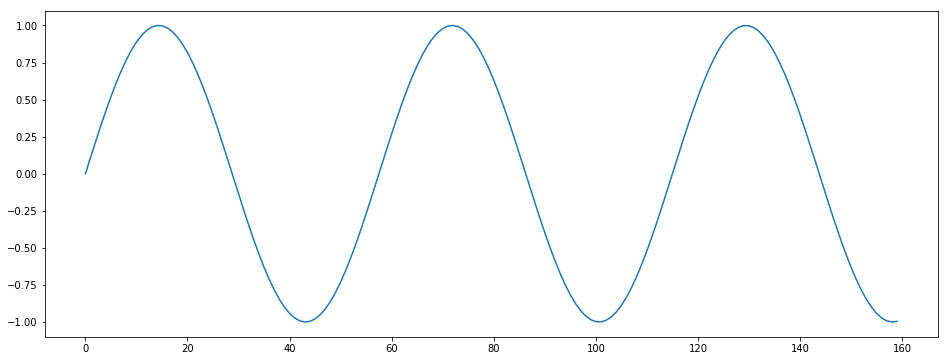

In [164]:
plt.plot(y[17])

In [128]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.add(RepeatVector(TS, ))
model.add(LSTM(10, return_sequences=1))
model.add(TimeDistributed(Dense(1, activation='tanh')))

model.compile('adam', 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
repeat_vector_24 (RepeatVect (None, 160, 1)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 160, 10)           480       
_________________________________________________________________
time_distributed_11 (TimeDis (None, 160, 1)            11        
Total params: 493.0
Trainable params: 493.0
Non-trainable params: 0.0
_________________________________________________________________


In [136]:
model.fit(x, y, epochs=2, verbose=0, callbacks=[TQDMNotebookCallback()])

In [137]:
freqs = [1,2,3]
Q = len(freqs)
test = np.array([1,2,3]).reshape((-1,1))
p = model.predict(test)
p = p.reshape((-1, TS))
p.shape

(3, 160)

/home/mike/ve/keras/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


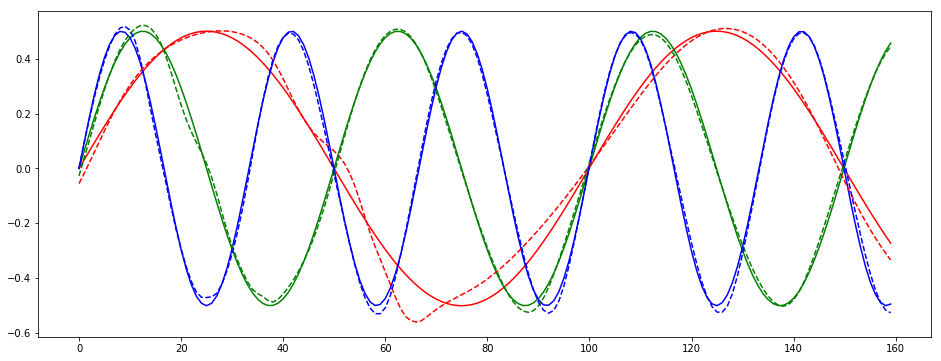

In [139]:
plt.gca().set_color_cycle(['red', 'green', 'blue',]*Q)
plt.plot(amp*np.sin(tv[len(test)]*test).T)
plt.plot(p.T, '--')


In [165]:

model = Sequential()
# model.add(TimeDistributed(Dense(1, activation='tanh', ), input_shape=(TS,1))) # not necessary, just for normalizing
# model.add(LSTM(10, return_sequences=1 ))
model.add(LSTM(10, input_shape=(TS,1)))

# model.add(LSTM(10, ))

model.add(Dense(1))
model.add(RepeatVector(TS, ))
model.add(LSTM(10, return_sequences=1))
model.add(TimeDistributed(Dense(1, activation='tanh')))

model.compile('adam', 'mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
_________________________________________________________________
repeat_vector_28 (RepeatVect (None, 160, 1)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 160, 10)           480       
_________________________________________________________________
time_distributed_16 (TimeDis (None, 160, 1)            11        
Total params: 982.0
Trainable params: 982.0
Non-trainable params: 0.0
_________________________________________________________________


In [166]:
model.fit(y, y, epochs=1, verbose=0, callbacks=[TQDMNotebookCallback()])

In [167]:
Q = 3
st = 50
test = y[st:st+Q]
p = model.predict(test)
p = p.reshape((-1, TS))
p.shape, test.shape

((3, 160), (3, 160, 1))

/home/mike/ve/keras/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


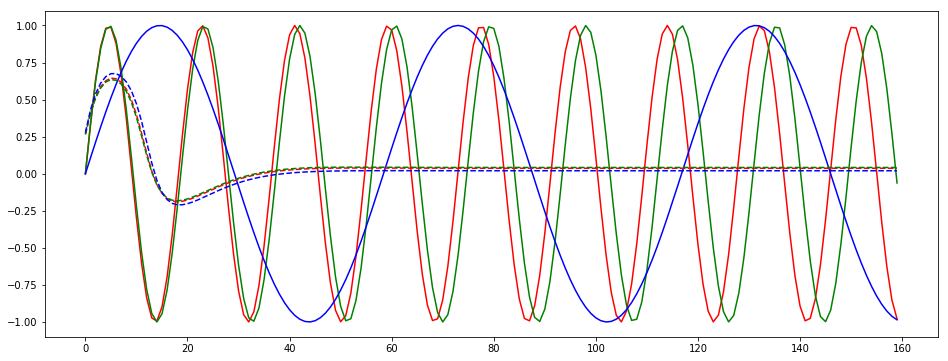

In [168]:
rcParams['figure.figsize'] = (16,6)
plt.gca().set_color_cycle(['red', 'green', 'blue',]*Q)

# plt.plot(np.sin(tv[len(test)]*test).T)

plt.plot(test.reshape((Q, TS)).T)
plt.plot(p.T, '--', )